In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
Datos = pd.read_excel('Datos_anonimizados_sin_llave.xlsx')
Datos

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,MES,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,...,DiasEstanciaClinica,DiasEstanciaClinica_exacto,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Transfusiones,Antioboticos,UCI_UCE
0,1,0,62,2022,Abril,2,69,1,43,3,...,1,1.048533,2,4,155,1,0,NO,NO,NO
1,2,1,89,2022,Marzo,2,48,2,32,7,...,4,3.943370,4,7,561,0,0,NO,NO,NO
2,3,1,90,2023,Septiembre,2,48,2,43,3,...,2,1.794684,4,8,5,0,2,NO,SI,NO
3,4,1,88,2022,Enero,2,69,1,43,3,...,3,2.564836,4,8,1,0,0,NO,SI,NO
4,5,0,89,2023,Agosto,3,69,1,43,3,...,5,5.486410,4,8,167,0,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,0,19,2023,Septiembre,2,48,1,43,3,...,2,2.565230,4,8,171,1,0,NO,NO,NO
43150,43151,0,31,2023,Septiembre,2,48,1,43,3,...,1,1.837406,4,8,555,1,0,NO,NO,NO
43151,43152,0,13,2023,Septiembre,2,48,1,43,8,...,1,1.015388,4,10,478,0,0,NO,NO,NO
43152,43153,1,6,2023,Septiembre,1,26,1,43,3,...,2,1.582988,4,10,242,0,0,NO,SI,NO


{'whiskers': [<matplotlib.lines.Line2D at 0x21d2d131150>,
 'caps': [<matplotlib.lines.Line2D at 0x21d2d0f5190>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d2d1305d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d2d0f7190>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d2e3216d0>],
 'means': []}

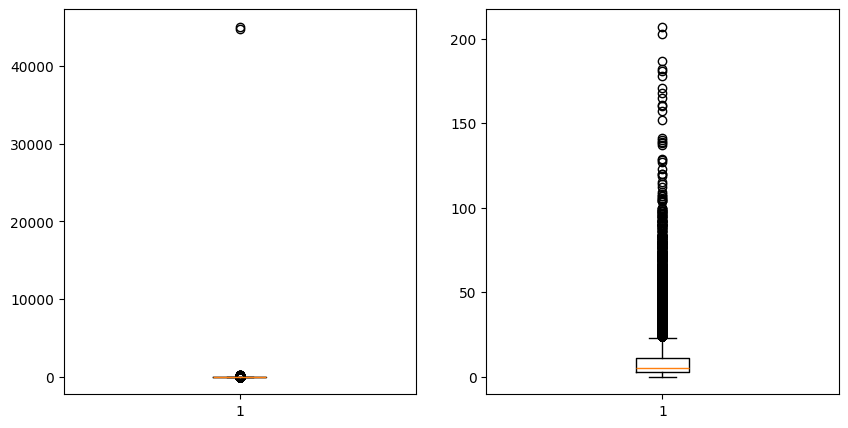

In [61]:
Datos2 = Datos.loc[:,['DiasEstanciaClinica_exacto', 'DiasEstanciaClinica']]
fig,axis = plt.subplots(1, 2, figsize=(10,5))
axis[0].boxplot(Datos2['DiasEstanciaClinica_exacto'])
axis[1].boxplot(Datos2['DiasEstanciaClinica'])


In [62]:
Datos2[Datos2['DiasEstanciaClinica_exacto']>4000]

,DiasEstanciaClinica_exacto,DiasEstanciaClinica
11314,45068.558090,0
30453,44785.759144,0


In [63]:
Datos2.drop([11314, 30453] , axis=0, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21d2ea1a650>,
 'caps': [<matplotlib.lines.Line2D at 0x21d2ea194d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d2e0b0890>],
 'medians': [<matplotlib.lines.Line2D at 0x21d2ea18b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d2e39a690>],
 'means': []}

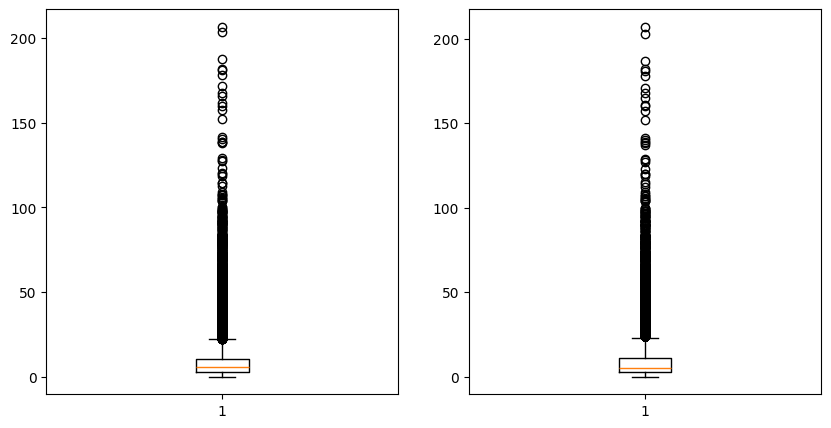

In [64]:
fig,axis = plt.subplots(1, 2, figsize=(10,5))
axis[0].boxplot(Datos2['DiasEstanciaClinica_exacto'])
axis[1].boxplot(Datos2['DiasEstanciaClinica'])


array([[<Axes: title={'center': 'DiasEstanciaClinica_exacto'}>,
        <Axes: title={'center': 'DiasEstanciaClinica'}>]], dtype=object)

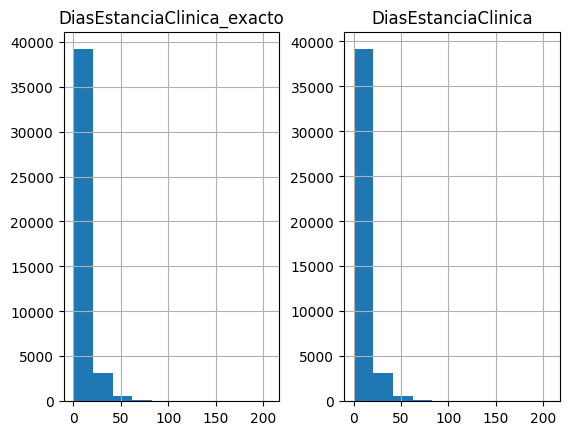

In [65]:
Datos2.hist()

(array([1.4000e+01, 4.5000e+01, 1.2000e+02, 1.7500e+02, 3.0250e+03,
        1.1136e+04, 1.6691e+04, 9.5870e+03, 2.2010e+03, 1.5800e+02]),
 array([-4.83215502, -3.8159083 , -2.79966158, -1.78341486, -0.76716814,
         0.24907858,  1.2653253 ,  2.28157202,  3.29781874,  4.31406546,
         5.33031218]),
 <BarContainer object of 10 artists>)

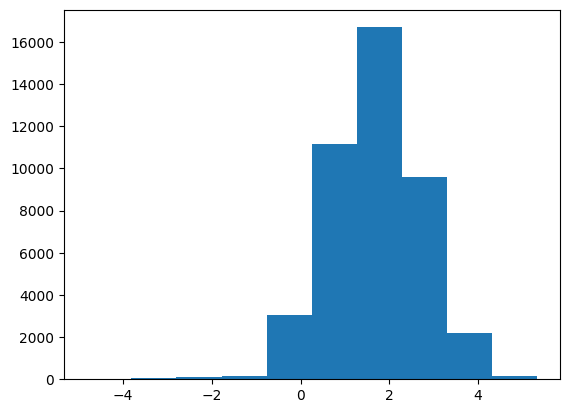

In [69]:
Datos3 = Datos2.iloc[:,0]
Datos3 = np.log(Datos3)
Datos3.replace([np.inf, -np.inf], 0, inplace=True)
plt.hist(Datos3)


In [73]:
DatosConNaN = Datos.replace({'Sin Informacion': np.NaN, 'Sin informacion en base de datos': np.NaN})
DatosConNaN['ClasificacionCronico_DX_MUERTE']

0         NaN
1         NaN
2        epoc
3         NaN
4         NaN
         ... 
43149     NaN
43150     NaN
43151     NaN
43152     NaN
43153     NaN
Name: ClasificacionCronico_DX_MUERTE, Length: 43154, dtype: object